# MTY4-NB02: Probability basics with SciPy and Seaborn
by Lizeth Hernandez
## Contents
Introduction 

0. Introduction
1. What is a random variable?\
   1.1. Types of random variables
2. Distributions\
   2.1. Discrete distributions\
   2.2. Continuous distributions
3. Understanding PDF and CDF
4. Exercises
4. Expectation values, variance and standard deviation
5. Central limit theorem



## 0. Introduction

In this course, we assume you are already familiar with the material typically covered in a semester-long course on probability and statistics.

In this notebook, we explore core discrete and continuous probability distributions using real samples and visualizations with Python. It is not intended to teach probability from scratch or from an axiomatic perspective, although we will revisit some foundational concepts during the club sessions.

If you wish to study the material in more depth, we recommend the following references:

- **Probability and Statistics for Engineers and Scientists**
    
    *by Ronald E. Walpole, Raymond Myers, Sharon L. Myers, and Keying E. Ye*
    
- **Introduction to Probability Theory**
    
    *by Hoel, Port, and Stone*
    

In this club, our goal is to explore emergent phenomena across various systems. Understanding the behavior of these macroscopic systems is central in statistical mechanics, which involves estimating the likelihood of individual components being in particular microscopic states. This, in turn, requires a probabilistic treatment of the system

We will focus on modeling randomness through simulation using the following packages: `numpy`, `matplotlib`, `seaborn`, and `SciPy`.

`seaborn` is a library built on top of `matplotlib` that provides tools for creating statistical graphics. `SciPy` is a scientific computing library built on `numpy`; in this notebook, we will focus on its `stats` subpackage.

Documentation for these libraries can be found at:

- *insert Seaborn documentation URL*
- *insert SciPy documentation URL*

The notebook **MTY4-NB01 Numpy Basics** includes an introduction to scientific computing with `numpy` and `matplotlib`. Please refer to that notebook if needed.

We begin by importing the libraries and setting up our plotting and random number generation environment.

- `sns.set(style="whitegrid")`: Configures the plot style to show a clean white background with helpful grid lines.

- `np.random.seed(42)`: Sets the seed for NumPy's pseudo-random number generator. This ensures that the random numbers you generate (and plots based on them) are reproducible every time you run the notebook.

Why 42? It's a widely used default inspired by *The Hitchhiker's Guide to the Galaxy*. You can use any number; the important part is that it's fixed.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid")
np.random.seed(42)

## 1. What is a random variable?

We start introducing our main element of study: random variables. 

Practically, a random variable denotes a numerical quantity whose value depends on the outcome of a random process. Mathematically, a random variable X is a real-valued function defined on a probability space.

### 1.1 Types of random variables:

- Discrete: finite or countable values (e.g., number of heads in 3 coin tosses)
- Continuous: values from a continuous range (e.g., height, time, velocity)

In [3]:

# Discrete Random Variable Example: Number of heads in 3 coin tosses

binom_rv = stats.binom(n=3, p=0.5)
print("Support:", binom_rv.support())
print("PMF at x=0 to x=3:", [binom_rv.pmf(x) for x in range(4)])
print("Mean:", binom_rv.mean())
print("Variance:", binom_rv.var())

# Continuous Random Variable Example: Time until event
exp_rv = stats.expon(scale=1)
print("PDF at x=1:", exp_rv.pdf(1))
print("CDF at x=1:", exp_rv.cdf(1))
print("Mean:", exp_rv.mean())
print("Variance:", exp_rv.var())

Support: (0, 3)
PMF at x=0 to x=3: [0.125, 0.37500000000000033, 0.3750000000000003, 0.125]
Mean: 1.5
Variance: 0.75
PDF at x=1: 0.36787944117144233
CDF at x=1: 0.6321205588285577
Mean: 1.0
Variance: 1.0


In Python, we use `scipy.stats` to define and work with random variables.


## 2. Discrete Distributions

some text

### Bernoulli Distribution

**Description:** Models binary outcomes such as success/failure, hit/miss.

**Example in physics:** Did a particle pass through a filter? Did a detector register a photon?

**Why it matters:** Forms the foundation for binomial processes and is key in modeling activation/inhibition events in emergent systems.


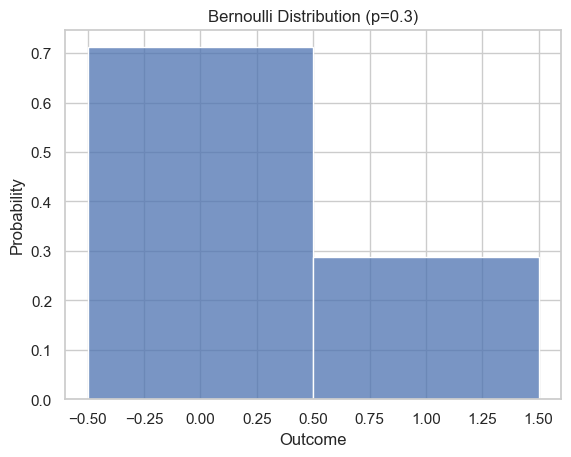

In [4]:
### Bernoulli Distribution
p = 0.3
bernoulli_samples = stats.bernoulli.rvs(p, size=1000)
sns.histplot(bernoulli_samples, discrete=True, stat="probability", bins=2)
plt.title("Bernoulli Distribution (p=0.3)")
plt.xlabel("Outcome")
plt.ylabel("Probability")
plt.show()

### Binomial Distribution

**Description:** Models a fixed number of repeated Bernoulli trials.

**Example in physics:** Number of excited atoms after pulses; number of particles escaping a region over fixed intervals.

**Why it matters:** Introduces probabilistic accumulation and builds practice for repeated sampling in Monte Carlo methods.

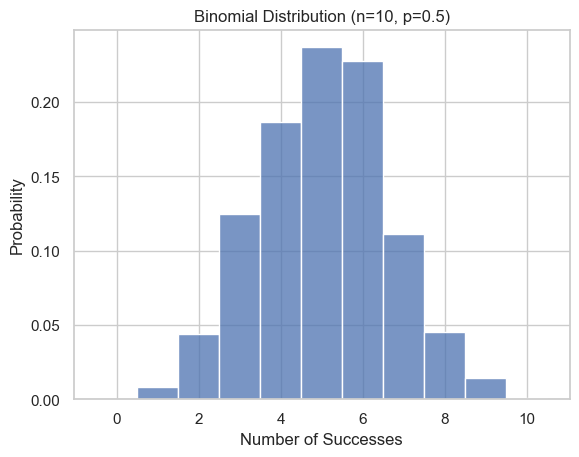

In [5]:
# Binomial Distribution
n, p = 10, 0.5
binom_samples = stats.binom.rvs(n, p, size=1000)
sns.histplot(binom_samples, stat="probability", bins=np.arange(n+2)-0.5)
plt.title("Binomial Distribution (n=10, p=0.5)")
plt.xlabel("Number of Successes")
plt.ylabel("Probability")
plt.show()

### Poisson Distribution

**Description:** Models the count of rare events over fixed time or space intervals.

**Example in physics:** Number of collisions per second; radioactive decays.

**Why it matters:** Connects directly to the exponential distribution and is key in event-driven simulation models.

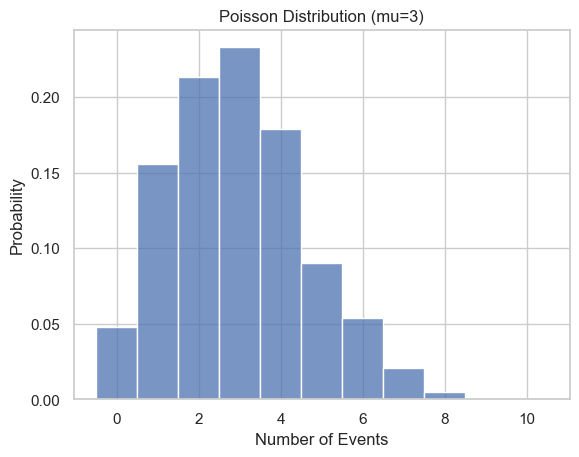

In [6]:
# Poisson Distribution
mu = 3
poisson_samples = stats.poisson.rvs(mu, size=1000)
sns.histplot(poisson_samples, stat="probability", bins=np.arange(0, 12)-0.5)
plt.title("Poisson Distribution (mu=3)")
plt.xlabel("Number of Events")
plt.ylabel("Probability")
plt.show()

## 2.2. Continuous Distributions

### *Normal Distribution*

**Description:** Describes the result of many small additive effects — bell curve shape.

**Example in physics:** Velocity of particles; measurement errors.

**Why it matters:** Central in modeling diffusion and Brownian motion; shows up in simulations of aggregate randomness.

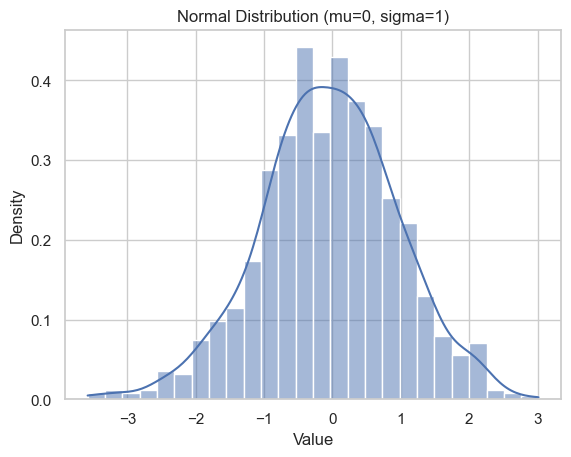

In [7]:
# Normal Distribution
mu, sigma = 0, 1
normal_samples = stats.norm.rvs(mu, sigma, size=1000)
sns.histplot(normal_samples, kde=True, stat="density")
plt.title("Normal Distribution (mu=0, sigma=1)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

### Exponential Distribution

**Description:** Models the time between independent Poisson events (memoryless).

**Example in physics:** Time until next particle decay or collision.

**Why it matters:** Core in simulating stochastic timing; foundational in kinetic Monte Carlo.

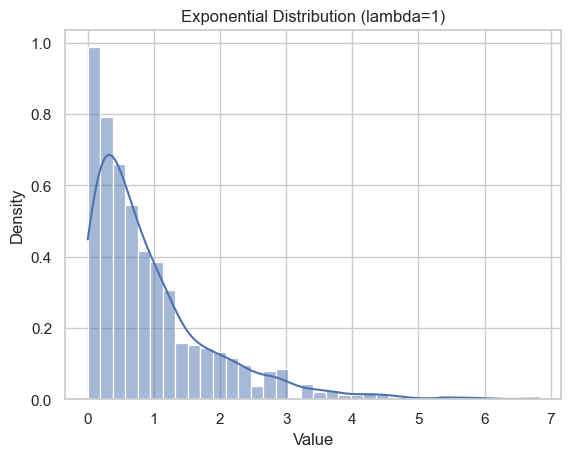

In [8]:
# Exponential Distribution
exp_samples = stats.expon.rvs(scale=1, size=1000)
sns.histplot(exp_samples, kde=True, stat="density")
plt.title("Exponential Distribution (lambda=1)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

### Beta Distribution
**Description:** Models probabilities themselves (bounded [0,1]).

**Example in physics:** Fraction of channels open; probability of path selection.

**Why it matters:** Useful in bounded uncertainty modeling and stochastic path choice.

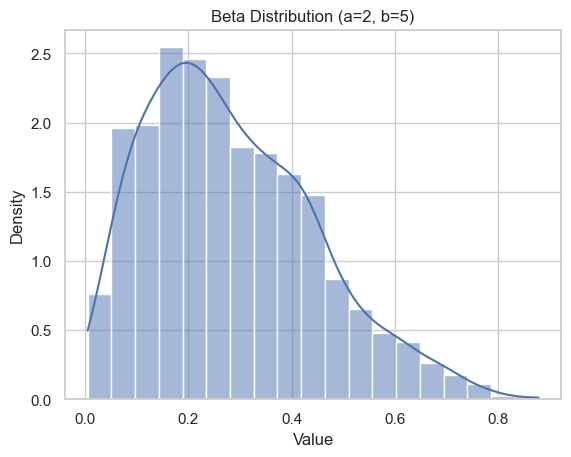

In [9]:
#Beta Distribution
a, b = 2, 5
beta_samples = stats.beta.rvs(a, b, size=1000)
sns.histplot(beta_samples, kde=True, stat="density")
plt.title("Beta Distribution (a=2, b=5)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

### Log-Normal Distribution

**Description:** Models outcomes from multiplicative random processes.

**Example in physics:** Particle sizes; energy cascades; income distribution.

**Why it matters:** Appears in systems with growth or fragmentation — key in emergent phenomena.


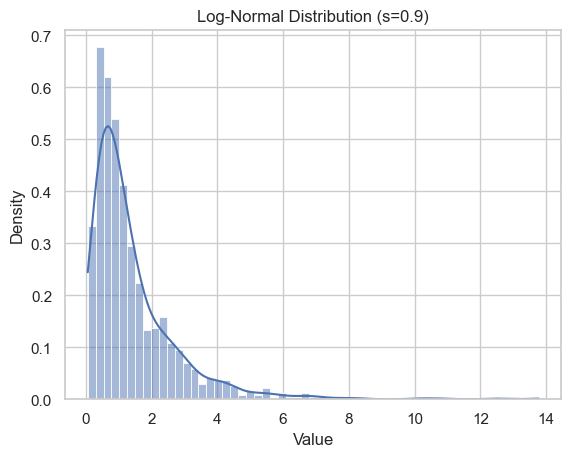

In [10]:
# Log-Normal Distribution
lognorm_samples = stats.lognorm.rvs(s=0.9, scale=np.exp(0), size=1000)
sns.histplot(lognorm_samples, kde=True, stat="density")
plt.title("Log-Normal Distribution (s=0.9)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

## 3. Understanding PDF and CDF

A Probability Density Function (PDF) describes how likely it is for a continuous random variable to take on a particular value or fall within a range. For example, in the normal distribution, the familiar bell curve is the PDF.

A Cumulative Distribution Function (CDF) gives the probability that a random variable is less than or equal to a specific value. It is the area under the PDF curve up to that point.

In SciPy, you can evaluate them using:
- `.pdf(x)`: probability density at x
- `.cdf(x)`: cumulative probability up to x

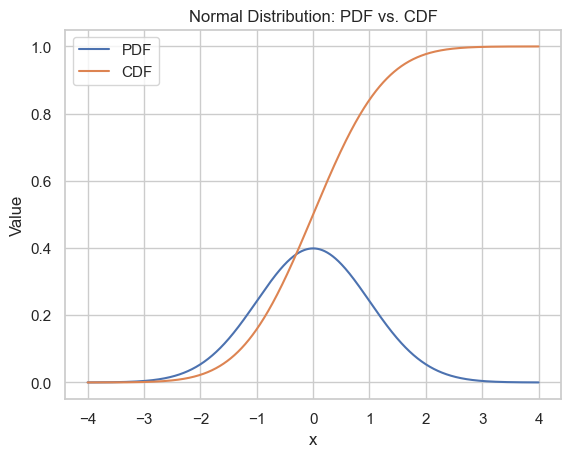

In [11]:
# Example: Normal Distribution PDF vs CDF
x = np.linspace(-4, 4, 1000)
mu, sigma = 0, 1
normal_rv = stats.norm(loc=mu, scale=sigma)

pdf_vals = normal_rv.pdf(x)
cdf_vals = normal_rv.cdf(x)

plt.plot(x, pdf_vals, label='PDF')
plt.plot(x, cdf_vals, label='CDF')
plt.title("Normal Distribution: PDF vs. CDF")
plt.xlabel("x")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

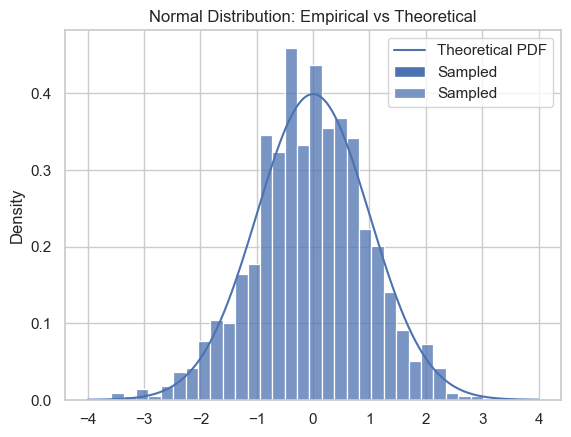

Sample Mean: -0.05269092129260678
Sample Variance: 1.0005714976806652
Theoretical Mean: 0.0
Theoretical Variance: 1.0


In [12]:
# Empirical vs Theoretical Comparison
# (Normal Distribution Example)
x = np.linspace(-4, 4, 1000)
theoretical_pdf = stats.norm.pdf(x, mu, sigma)
plt.plot(x, theoretical_pdf, label="Theoretical PDF")
sns.histplot(normal_samples, kde=False, stat="density", bins=30, label="Sampled")
plt.title("Normal Distribution: Empirical vs Theoretical")
plt.legend()
plt.show()


# 6. Empirical Expectation and Variance
print("Sample Mean:", np.mean(normal_samples))
print("Sample Variance:", np.var(normal_samples))
print("Theoretical Mean:", stats.norm.mean(loc=mu, scale=sigma))
print("Theoretical Variance:", stats.norm.var(loc=mu, scale=sigma))


## 4. Exercises


#### *Simulate and Visualize a Bernoulli Trial*
 - Generate 1000 samples from a Bernoulli distribution with p = 0.7 and plot the result.


In [13]:
# ---------Exercise-----------

# your code here

#### *Compare Two Binomial Distributions*
- Plot two Binomial distributions: one with p=0.5 (fair), and one with p=0.2 (biased).

In [14]:
# ---------Exercise-----------

# your code here

#### *Estimate the Mean of a Normal Distribution Empirically*
- Generate 10,000 samples from N(5, 2) and compare the sample mean/variance to theoretical values.

In [15]:
# ---------Exercise-----------

# your code here

#### *Poisson vs. Normal Approximation*
- Generate Poisson(mu=10) samples and compare histogram to normal approximation with same mean/variance.


In [16]:
# ---------Exercise-----------

# your code here

#### *Visualize the CDF of an Exponential Distribution*
- Plot exp.cdf vs histogram of samples to understand the relationship between the PDF and CDF.

In [17]:
# ---------Exercise-----------

# your code here